<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/functions_and_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

Note of warning: today we will be talking about two very different types of functions: mathematical and programming, which means the language will get confusing at some points.

## A mathematical function

A function in mathematics is a map from a set of **inputs** $X$ to a **single output** $y$:

$$
y = f(X)
$$

By now you should be very familiar with linear functions, for example:

$$
y = f(x_1,x_2) = 5 + 3 x_1 + 7.4 x_2
$$

Where $x_1$ and $x_2$ are the inputs of this function.

It can also take a lot more complicated (and complex) forms, such as:

$$
y = x_1 e^{-(x_1^2 + x_2^2)}
$$

But the rules are always the same, a set of inputs always produces the same output, and this output is unique!

For more information see [this wikipedia page](https://en.wikipedia.org/wiki/Function_(mathematics))

## Function families

Mathematical functions can be grouped into families. Function families are just a group of function that share some similarities, and it is a very general concept.

However, one very useful (but somewhat limited) way of defining a function family is through the use of **parameters**. As an example, we can define a family of linear functions as:

$$
f(x_1,x_2) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 = \beta_0 + \sum_{i=1}^2 \beta_i x_i
$$


which contains all possible linear functions containing two inputs $(x_1,x_2)$. By choosing different values for $(\beta_0, \beta_1, \beta_2)$, we have different functions in this family. It is also possible to define a smaller subfamily as:

$$
f(x_1,x_2) = \beta + 5 x_1 + 3 x_2
$$

which contains all linear functions parallel to $f(x_1,x_2) = 5 x_1 + 3 x_2$,  and so on.

### Exercise
1. Polynomials are a family of functions that expand on linear functions by also allowing any exponentiation of the inputs, such as $x^2$ or $x^{42}$ (e.g. $f(x) = 1+x^2 -3x^8$). Write down the definition of the polynomial family of functions that take only one input $x$, using parameters.

$f(x) = a_0 + a_1x + a_2 x^2 + ... + a_nx^n$


## A Python function

A function in python is similar in the sense that it takes **inputs** and **paramaters**, and produces an output. However, python functions are a lot more flexible in what kind of inputs, parameters, and outputs it allows.

For more information see [this wikipedia page](https://en.wikipedia.org/wiki/Function_(computer_programming))

You should already be familiar with how to write python functions, but a generic function will read like the following:

```python
def new_function(input1, input2, parameter1, parameter2):
  # some operations here
  return output1, output2
```

The first line of code gives the function a name and defines what the inputs and parameters are. The last line defines what the outputs are. But the important part is what happens in between.

Here is an example of a function that returns the lenght of the diagonal of a rectangle of side lengths *a* and *b*

In [ ]:
def hypotenuse(a,b):
  hyp = np.sqrt(a**2 + b**2)
  return hyp

hypotenuse(3,4)

5.0


## Writing a mathematical function as a Python function

By now you have noticed that it is very easy to write a mathematical function as a python function, but we want to do it in a structured way. We follow the convention of

$$
y = f(x_1,x_2,...) = f(X)
$$

with $X$ a vector containing all the variables needed for the function. For example, we write $f(X) = 4 + 5 x_1 + 3 x_2$ as

```python
def linear_fun(x):
  y = 4 + 5*x[0] + 3 * x[1]
  return y
```

With any input x taking the form ``x = [x1,x2]``. We can see how this works below:

In [1]:
def linear_fun(x):
  y = 4 + 5*x[0] + 3 * x[1]
  return y

linear_fun([1,2])

15

## Writing a function family as a python function

In the same way, we can write a python function that defines a family of mathematical functions simply by including parameters as inputs in the python function. While doing so, we should be careful to keep the convention for the input $X$ above. The python function will then take the form ``fun(x,parameter1,parameter2,...)`` as seen on the example below:

In [ ]:
def linear_fun_family(x,a,b,c):
  y = a + b*x[0] + c * x[1]
  return y

linear_fun_family([1,2], a=4, b=5, c=3)

15

### Exercise
1. Write the python function that is equivalent to
$$
f(X) = \frac{2x_3 \sqrt{x_1 + 2}}{x_2}
$$
2. Evaluate the function for the following inputs: $X = (1,2,3)$, $(2,0,-5)$, $(1,-3,3)$. Make a short comment on the results.
3. Write a python function that is equivalent to the following function family:
$$
f(x) = \frac{L}{1+e^{-k(x-a)}}
$$

In [8]:
def lin_func_1(x):
  num = 2*x[2] * np.sqrt(x[0]+2)
  denom = x[1]
  y = num/denom
  return y

an1 = lin_func_1([1,2,3]) # 5.196152422706632
an2 = lin_func_1([2,0,-5]) # -inf -> due to x[1] = 0
an3 = lin_func_1([1,-3,3]) # -3.464101615137755

print(an1)
print(an2)
print(an3)

def lin_func_2(x, L, k, a):
  num = L
  denom = 1 + np.exp(-k*(x-a))
  y = num/denom
  return y

5.196152422706632
-inf
-3.464101615137755


<ipython-input-8-6f98dfeafd95>:4: RuntimeWarning: divide by zero encountered in scalar divide
  y = num/denom



## Plotting a function

Once a function is defined, we can easily plot it using the *matplotlib* library. The ``plot`` function in this library, however, cannot plot functions directly, but needs a collection of points which it uses to contruct a graph.

To create this collection of points, the numpy function ``linspace`` is very useful. It creates a sequence of evenly spaces points in a given range, with a specific argument for how many points shoudl be present in the range. Its sintax is

```python
linspace(start,stop,number_of_points)
```

We can then use this directly a defined function, as seen on the following example:

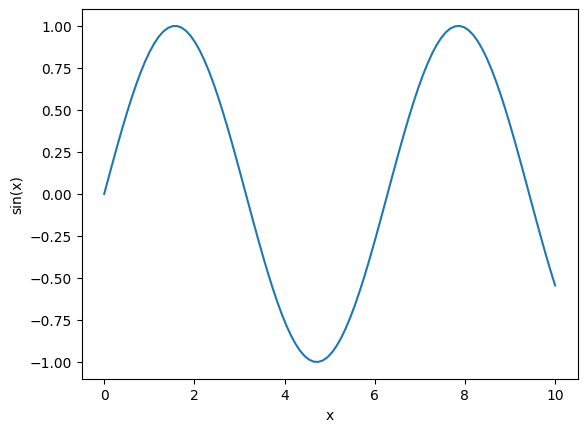

In [ ]:
def sine(x):
  y = np.sin(x)
  return y

x = np.linspace(0,10,100)
y = sine(x)

plt.plot(x,y)
plt.ylabel('sin(x)')
plt.xlabel('x')
plt.show()

### Exercise
1. Define the following function in python:
$$
f(x) = e^{-x}\cos(3x)
$$
2. Plot it, in the range $x=[0,10]$, using 10, 100 and 1000 points. Comment on the results.

3. a. Plot both of the following functions on the same plot, with $t\in [0,20]$:
$$
a = e^{-t}\cos t \\
b = e^{-t}\sin t
$$
b. Now make a different plot, placing $a$ on the horizontal axis, and $b$ on the vertical axis. Use the same range for $t$. What do you see? Change the range of $t$ and make the plot again.

4. (Advanced) Now plot the function
$$
f(x_1,x_2) = x_1 e^{-(x_1^2 + x_2^2)}
$$
on the range $x_1,x_2 ∈ [-2,2]$.
This will be a 3D surface plot, for which you will need to make use of numpy's [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function and matplotlib's [plot_surface](https://matplotlib.org/stable/plot_types/3D/surface3d_simple.html) function.




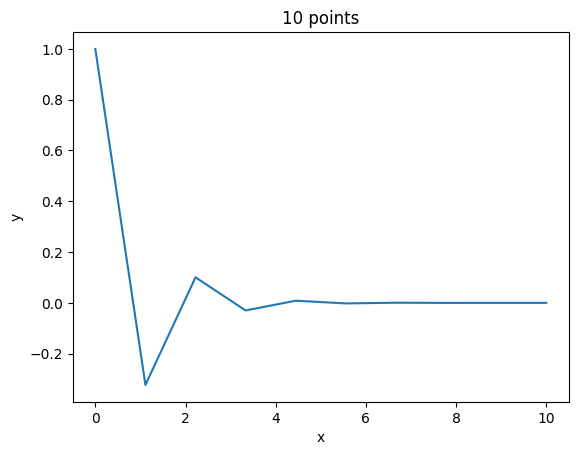

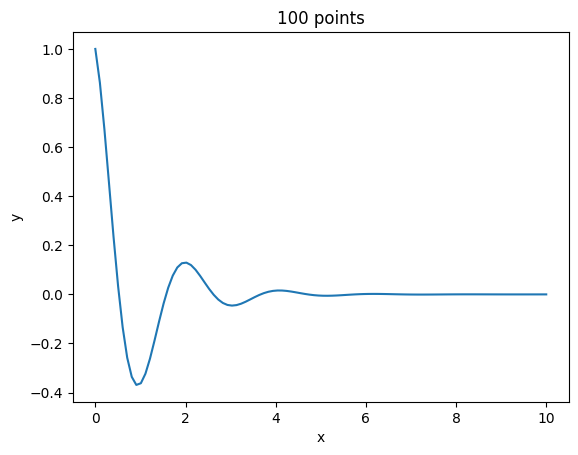

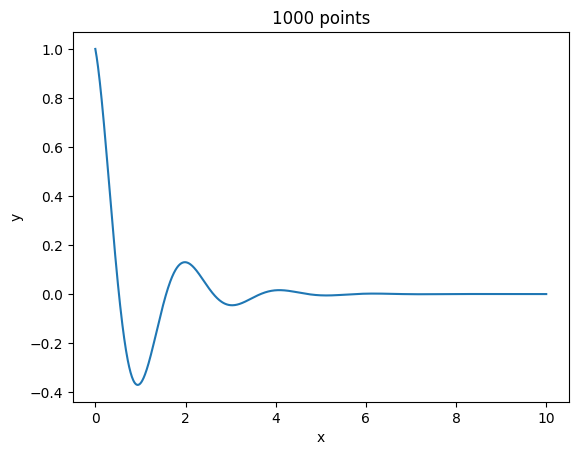

In [14]:
def lin_fun_ex3(x):
  y = np.exp(-x)*np.cos(3*x)
  return y

# Define various resolutions
num_points = [10, 100, 1000]

# Plot the results for each resolution
for n in num_points:
    x = np.linspace(0, 10, n)
    y = lin_fun_ex3(x)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{n} points')
    plt.show()

# The plot with 10 points is heavily undersampled - thus we can see very sharp corners in a continuous function.
# The plots with 100 and 1000 points show continuous functions. Thus, I can conclude that for this function, 1000 points over the interval [0, 10] is oversampled and the function is doing more computing than it should.
# The proper (minimum) sampling can be determined with the Nyquist condition, though typically the period can be practically oversampled at a frequency of 5x higher than the Nyquist condition suggests.

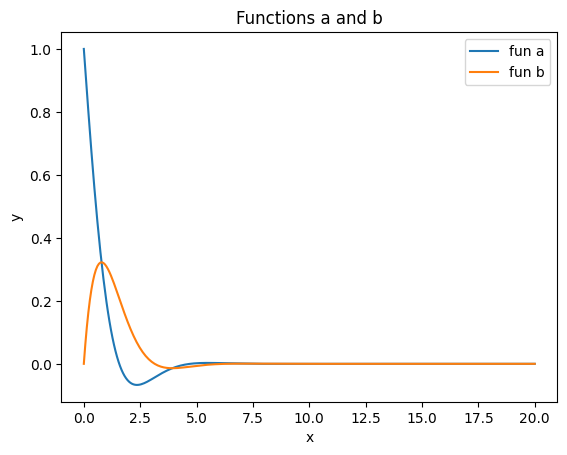

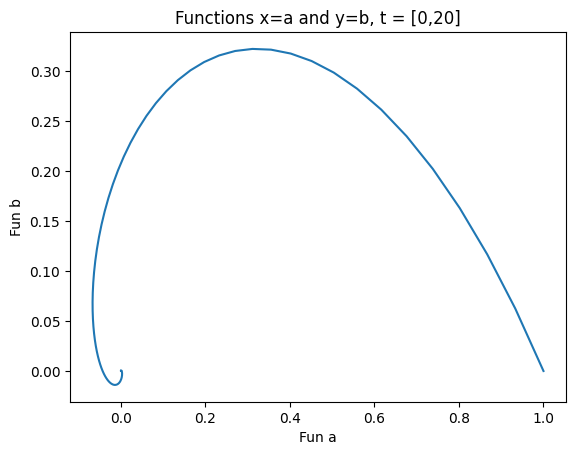

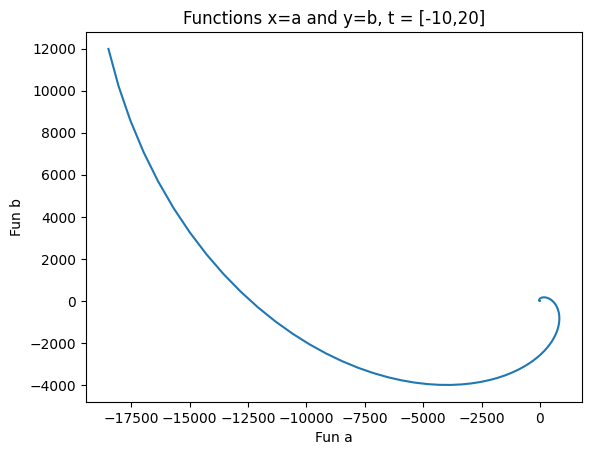

In [25]:

# . Plot both of the following functions on the same plot, with  𝑡∈[0,20] :
# b. Now make a different plot, placing  𝑎  on the horizontal axis, and  𝑏  on the vertical axis. Use the same range for  𝑡 . What do you see? Change the range of  𝑡  and make the plot again.
def fun_3a(t):
  a = np.exp(-t)*np.cos(t)
  return a

def fun_3b(t):
  b = np.exp(-t)*np.sin(t)
  return b

t = np.linspace(0, 20, 300)
t21 = -10
t22 = 20
t2 = np.linspace(t21, t22, 500)

plt.plot(t, fun_3a(t), label = 'fun a')
plt.plot(t, fun_3b(t), label = 'fun b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Functions a and b')
plt.legend()
plt.show()

plt.plot(fun_3a(t), fun_3b(t))
plt.xlabel('Fun a')
plt.ylabel('Fun b')
plt.title('Functions x=a and y=b, t = [0,20]')
plt.show()

plt.plot(fun_3a(t2), fun_3b(t2))
plt.xlabel('Fun a')
plt.ylabel('Fun b')
plt.title(f'Functions x=a and y=b, t = [{t21},{t22}]')
plt.show()



**Comments on the above exercise:** Considering the fact that functions a and b both reach an asymptote around t = 7, increasing the range of t past 20 wont create any changes in the graph with x = fun a and y = fun b.
There are, however, huge changes in the values of the graph when t is negative. This is due to the fact that the value of y = e^{-x} tends to infinity as the x value decreases in the negative domain.

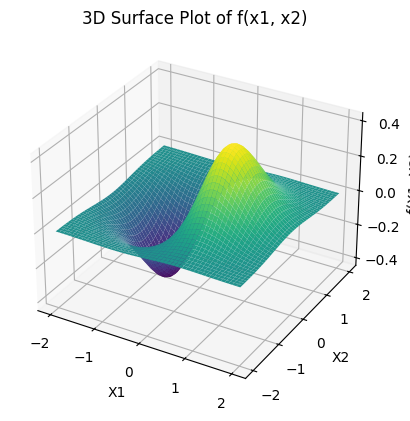

In [30]:
# (Advanced) Now plot the function
# 𝑓(𝑥1,𝑥2)=𝑥1𝑒−(𝑥21+𝑥22)
# on the range  𝑥1,𝑥2∈[−2,2] . This will be a 3D surface plot, for which you will need to make use of numpy's meshgrid function and matplotlib's plot_surface function.

from mpl_toolkits.mplot3d import Axes3D

def fun_3D(x1, x2):
  y = x1*np.exp(-1*(x1**2 + x2**2))
  return y

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 50)
X1, X2 = np.meshgrid(x1, x2)

Y = fun_3D(X1, X2)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('3D Surface Plot of f(x1, x2)')
plt.show()


## Fitting a mathematical function

Given a set of datapoints, we might want to find the function in a family that best describes that data. This is also known as function fitting.

One common way of choosing such function is the **least squares method**, where we select the function that minimizes the sum of the square of the distances between each individual datapoint and the function. An example of how these distances are calculated can be seen on this figure:

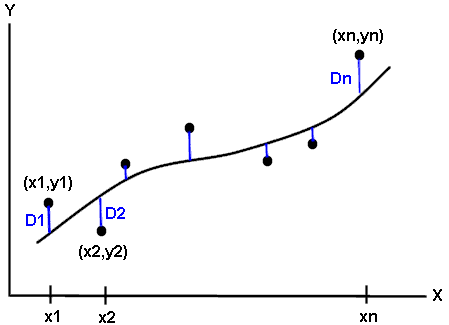


For more information on the least squares principle, [this MathWorld entry](https://mathworld.wolfram.com/LeastSquaresFitting.html) is very informative

## Fitting a function using Python

In this course, you don't need to concern yourself with the maths behind least squares, the Scipy library in Pyhton can be used to fit any function using this principle.

All we need to do is give it the python equivalent of a family function family (as seen above) and a set of data, and the scipy will perform an optimization to find the best function, giving you the best set of parameters.

Let's look at the scipy.optimize.curve_fit function, this is how you call it

```python
popt, pcov = sp.optimize.curve_fit(func, xdata, ydata)
```
* **func** is a python function that represents a family of mathematical functions.
* **xdata** and **ydata** are the input and output data of the mathematical function, respectively. xdata can be multidimensional, but ydata not.
* **popt** (optimum parameters) gives you the parameters that best fit the data
* **pcov** (parameter covariance) gives you the estimated covariance for the optimum parameters, from which you can see how certain the estimates are.

Let's see this in practice, first we will create a function that generates noisy data (Gaussian noise) for any given function:

In [ ]:
def generate_noisy_data(func, n_data_points, noise_level, range):
  xdata = np.sort(np.random.uniform(range[0],range[1],n_data_points))
  y = func(xdata)
  y_noise = noise_level * np.random.normal(size=xdata.size)
  ydata = y + y_noise
  return xdata, ydata

And we will test it using the following family of functions:
$$
y = ae^{-bx} +c
$$

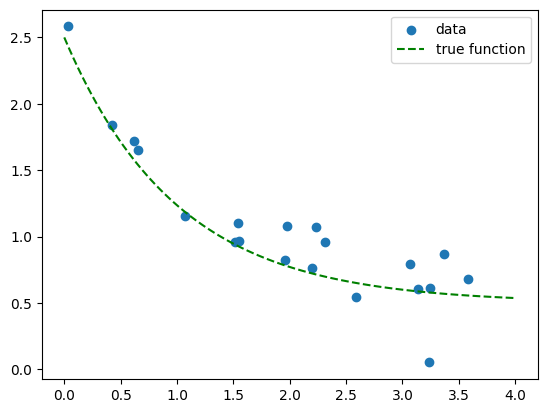

In [ ]:
def decay_family(x, a, b, c):
  y = a * np.exp(-b * x) + c
  return y

def decay_func(x): #This selects just one function from the family
  return decay_family(x, 2, 1, 0.5)

x_plot = np.linspace(0,4,100)

xdata, ydata = generate_noisy_data(decay_func, 20, 0.2,[0,4])
plt.scatter(xdata, ydata, label='data')
plt.plot(x_plot,decay_func(x_plot), linestyle='--', label='true function', color='green')
plt.legend()
plt.show()

In [ ]:
popt, pcov = sp.optimize.curve_fit(decay_family, xdata, ydata)

popt

array([2.04632043, 0.92876173, 0.53814267])

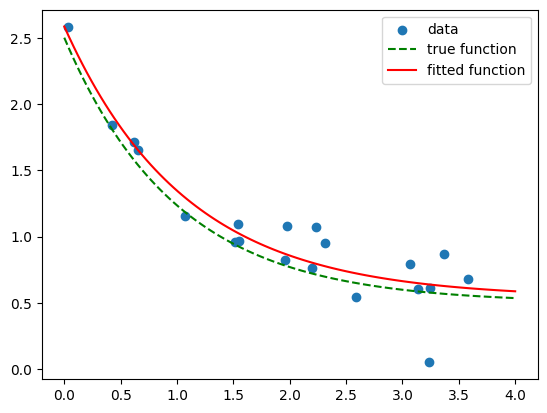

In [ ]:
a_opt = popt[0]
b_opt = popt[1]
c_opt = popt[2]

y_fit = decay_family(x_plot, a_opt, b_opt, c_opt)

plt.scatter(xdata, ydata, label='data')
plt.plot(x_plot,decay_func(x_plot), linestyle='--', label='true function', color='green')
plt.plot(x_plot,y_fit, label='fitted function', color='red')
plt.legend()
plt.show()

### Exercise
1. Use the following function family.
$$
x(t) = ae^{-t}\cos(ωt + ϕ)
$$
  * Write down the corresponding python function.
  * Pick a specific function in the family by specifying its parameters.
  * Use the ``generate_noisy_data`` function to generate sample data.
  * Find the fitted function using ``curve_fit``.
2. Now, play arround with the ``generate_noisy_data`` function, and see how the noise level and size of the data influence how good your fit is.